## Here we will learn to created DL model for coffee roasting problem.
- We are creating a model which tells at what tempearture and duration for coffee beans to roast to get best powder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [2]:
X,Y = load_coffee_data();

print(X[10],Y[10]) # seeing random data from given X[10][0] is giving us temp X[10][1] is duration
print(X.shape, Y.shape)

[196.7   13.54] [1.]
(200, 2) (200, 1)


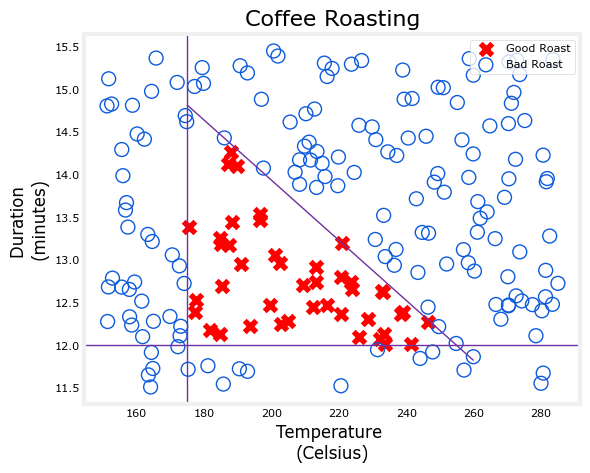

In [3]:
plt_roast(X,Y)

Since we have temperature ranging in hundreds and duration ranging in tens we need to match the scale i.e. we will now normalize our dataset.

In [4]:
print("Before Normalization")
print(f"Temperature Max, Min: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")


print("After Normalization")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance , adapt is a method which found mean & variance
Xn = norm_l(X) # normalized results.
print(f"Temperature Max, Min : {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min : {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Before Normalization
Temperature Max, Min: 284.99, 151.32
Duration    Max, Min: 15.45, 11.51
After Normalization
Temperature Max, Min : 1.66, -1.69
Duration    Max, Min : 1.79, -1.70


In [5]:
# We are having less input i.e. m numbers of training eg is 2000 which is less for NN so we are copying input and creating more input.

Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt,Yt)
print(Xt.shape, Yt.shape)   

[[-0.83 -0.65]
 [ 1.03 -1.39]
 [ 0.31  0.87]
 ...
 [ 1.38 -0.3 ]
 [ 0.05 -0.56]
 [ 1.66 -0.62]] [[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
(200000, 2) (200000, 1)



### Our Tensorflow Model
   <centre> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <centre/>  
Let's build the "Coffee Roasting Network" described in lecture. There are two layers with sigmoid activations as shown below:

In [6]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),                             #Shape tells we have 2 layers
        Dense(3, activation='sigmoid', name = '1stlayer'),      #Dense give additional info on each layer here it's 1st layer and have 3 newurons and activation funciton is sigmoid
        Dense(1, activation='sigmoid', name = '2ndlayer')
     ]
)

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1stlayer (Dense)            (None, 3)                 9         
                                                                 
 2ndlayer (Dense)            (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


>**Note 1:** The `tf.keras.Input(shape=(2,)),` specifies the expected shape of the input. This allows Tensorflow to size the weights and bias parameters at this point.  This is useful when exploring Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the `model.fit` statement.  
>**Note 2:** Including the sigmoid activation in the final layer is not considered best practice. It would instead be accounted for in the loss which improves numerical stability. This will be described in more detail in a later lab.

The `model.summary()` provides a description of the network:

In [8]:
L1_num_params = 2 * 3 + 3   # 2 are number of features 3 are number of neurons  + 3 is bias for each neuron
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


Let's examine the weights and biases Tensorflow has instantiated.  The weights $W$ should be of size (number of features in input, number of units in the layer) while the bias $b$ size should match the number of units in the layer:
- In the first layer with 3 units, we expect W to have a size of (2,3) and $b$ should have 3 elements.
- In the second layer with 1 unit, we expect W to have a size of (3,1) and $b$ should have 1 element.

In [9]:
W1, b1 = model.get_layer("1stlayer").get_weights()
W2, b2 = model.get_layer("2ndlayer").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.09 -1.05 -0.54]
 [ 0.23 -0.81  1.03]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.66]
 [-0.45]
 [-0.32]] 
b2(1,): [0.]


The following statements will be described in detail in Week2. For now:
- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [12]:
#model compile has info for model operations our model will have gradient loss as loss function and we optimise it
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

# model fit is for running what we have in model compile
model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 42s 6ms/step - loss: 9.4942e-04
Epoch 2/10
6250/6250 [==============================] - 42s 7ms/step - loss: 7.1330e-04
Epoch 3/10
6250/6250 [==============================] - 46s 7ms/step - loss: 5.5201e-04
Epoch 4/10
6250/6250 [==============================] - 42s 7ms/step - loss: 4.2439e-04
Epoch 5/10
6250/6250 [==============================] - 40s 6ms/step - loss: 3.3225e-04
Epoch 6/10
6250/6250 [==============================] - 33s 5ms/step - loss: 2.5956e-04
Epoch 7/10
6250/6250 [==============================] - 42s 7ms/step - loss: 2.0421e-04
Epoch 8/10
6250/6250 [==============================] - 28s 5ms/step - loss: 1.7119e-04
Epoch 9/10
6250/6250 [==============================] - 24s 4ms/step - loss: 1.3600e-04
Epoch 10/10
6250/6250 [==============================] - 22s 3ms/step - loss: 1.2336e-04


#### Epochs and batches
In the `compile` statement above, the number of `epochs` was set to 10. This specifies that the entire data set should be applied during training 10 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/10
6250/6250 [==============================] - 6s 910us/step - loss: 0.1782
```
The first line, `Epoch 1/10`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches. The notation on the 2nd line `6250/6250 [====` is describing which batch has been executed.

- Updated Weights
- After fitting, the weights have been updated:

In [15]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test) #step of normalizing testing data
predictions = model.predict(X_testn)
print("predictions = \n", predictions)


1/1 [==============================] - 0s 265ms/step
predictions = 
 [[1.00e+00]
 [1.08e-09]]
predictions = 
 (2, 1)


To convert the probabilities to a decision, we apply a threshold:

In [16]:
yhat = np.zeros_like(predictions)
print(yhat) #creating yhat same as our predictions otp
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

[[0.]
 [0.]]
decisions = 
[[1.]
 [0.]]


This can be accomplished more succinctly:

In [17]:
a = np.array([1.1, 2.2, 3.3]).astype('int')
print(a)

[1 2 3]


In [18]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


## Layer Functions
Let's examine the functions of the units to determine their role in the coffee roasting decision. We will plot the output of each node for all values of the inputs (duration,temp). Each unit is a logistic function whose output can range from zero to one. The shading in the graph represents the output value.


[[-0.09 -1.05 -0.54]
 [ 0.23 -0.81  1.03]] [0. 0. 0.]


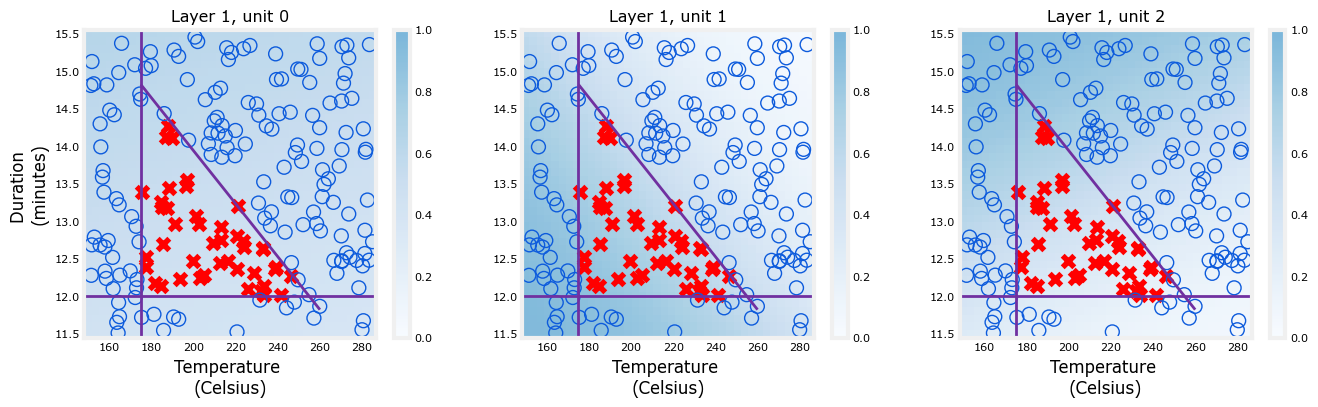

In [22]:
print(W1,b1)
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

The shading shows that each unit is responsible for a different "bad roast" region. unit 0 has larger values when the temperature is too low. unit 1 has larger values when the duration is too short and unit 2 has larger values for bad combinations of time/temp. It is worth noting that the network learned these functions on its own through the process of gradient descent. They are very much the same sort of functions a person might choose to make the same decisions.


The function plot of the final layer is a bit more difficult to visualize. It's inputs are the output of the first layer. We know that the first layer uses sigmoids so their output range is between zero and one. We can create a 3-D plot that calculates the output for all possible combinations of the three inputs. This is shown below. Above, high output values correspond to 'bad roast' area's. Below, the maximum output is in area's where the three inputs are small values corresponding to 'good roast' area's.

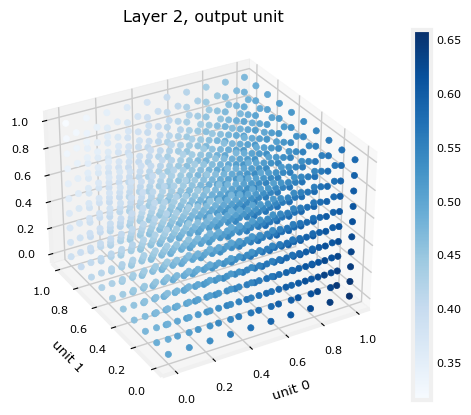

In [20]:
plt_output_unit(W2,b2)

The final graph shows the whole network in action.  
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.   
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.  
The following takes a moment to run

In [23]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)

1/1 [==============================] - 0s 217ms/step


# We created now normal tensorflow nn now it's time to learn this lab again and implement or understand all the import function